## 8. 대표적인 연속형 확률분포
### - 정규분포
### - 지수분포
### - 카이제곱분포
### - t 분포
### - F 분포

* Numpy, SciPy의 stats 활용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
# E(X), V(X) -> 기댓값, 분산에 대한 함수
# check_prob -> 확률변수를 인수로 취하여 그 확률변수가 확률의 성질을 만족하는지 확인하고 기댓값과 분산을 계산하여 변환
# plot_prob -> 확률변수와 구간을 인수로 취하고, 그 확률변수의 밀도함수와 분포함수를 그리는 함수
linestyles = ['-','--',':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value{E(X):.3f}')
    print(f'variance{V(X):.3f}')

def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'gray')
    ax.plot(xs, [F(x) for x in xs], label = 'F(x)', ls = '--', color = 'gray')
    
    ax.legend()
    plt.show()

#### 1. 정규분포 (Normal Distribution, = 가우스분포)
* $N(\mu,\sigma^2)$ -> 취할 수 있는 값은 실수 전체
* 파라미터인 $\mu$와 $\sigma^2$는 각각 평균과 분산이 됨
* $\mu$는 실수, $\sigma$는 양의 실수
* 정규분포의 밀도함수:\
$f(x) = {1\over{\sqrt{2\pi}\sigma}}\exp({{-(x-\mu)^2\over2\sigma^2}}) \ (-\infty < x < \infty)$
* 예시: 남자고등학생의 키, 모의고사 점수 등
* $X \sim N(\mu,\sigma^2)$일 때:\
$ E(X) = \mu,\ V(X) = \sigma^2$
* 정규분포를 따르는 확률변수 X를 aX+b와 같이 변환한 경우, 변환한 확률분포도 정규분포를 따른다.
* $X \sim N(\mu,\sigma^2)$일 때, 임의의 실수 a,b에 대해서:\
$ aX+b \sim N(a\mu,\ a^2\sigma^2)$이 성립
* 이 성질을 활용해 $X \sim N(\mu,\sigma^2)$을 정규화한 확률변수 $Z = X - \mu \over \sigma$가 $N(0,1)을 따른다는 것을 알 수 있음
* 이를 표준정규분포(Standard Normal Distribution)라 함

In [3]:
# numpy로 구현
def N(mu, sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1 / np.sqrt(2* np.pi* sigma**2) * np.exp(-(x-mu)**2 / (2* sigma**2))
    return x_range, f

In [4]:
# N(2, 0.5^2)
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
check_prob(X)

expected value2.000
variance0.250


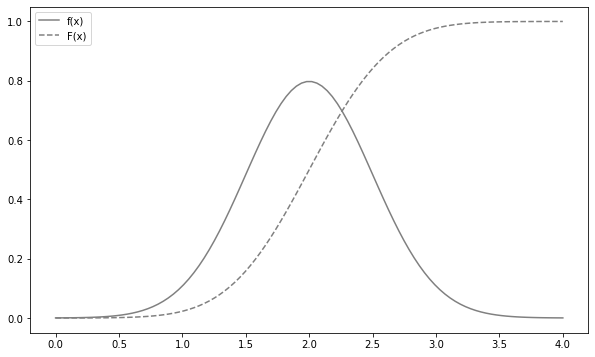

In [6]:
# 밀도함수와 분포함수를 0과 4 사이의 구간에서 그려보기
plot_prob(X, 0, 4)

In [7]:
# scipy.stats의 norm
rv = stats.norm(2, 0.5)

In [8]:
rv.mean(), rv.var()

(2.0, 0.25)

In [9]:
# 밀도함수 -> pdf 메서드 활용
rv.pdf(2)

0.7978845608028654

In [10]:
# 분포함수 -> cdf 메서드 활용
# 영역면적 구하기
rv.cdf(1.7)

0.27425311775007355

* isf 메서드 -> 상위 100$\alpha$%'점'을 구할 수 있음
* 100$\alpha$%점 -> $P(X\geq x) = \alpha$를 만족하는 x로, 영역의 면적이 $\alpha$일 때 왼쪽 끝의 x좌표에 해당
* 특히 표준정규분포에서 자주 사용 ($z_\alpha$)
* $z_\alpha$는 $Z \sim N(0,1)$이라면, $P(Z \geq z_\alpha) = \alpha$
* 표준정규분포는 x=0을 중심으로 대칭인 형태를 띠기 때문에 $z_{1-\alpha} = -z_\alpha$

In [11]:
# 상위 30%점 구하기
rv.isf(0.3)

2.2622002563540207

* interval 메서드 -> 확률이 $\alpha$가 되는 가운데 부분의 '구간'을 구할 수 있음
* 즉, 영역이 $\alpha$가 되는 a,b를 구하는 것
* $P(a \leq X \leq b) = \alpha$를 만족하고, $P(X \leq a) = P(X \geq b) = {{1-\alpha} \over 2}$를 만족

In [12]:
# 90% 구간 구하기
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [13]:
# 오른쪽 왼쪽 각각 5%씩 남아 있는거기 때문에...
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

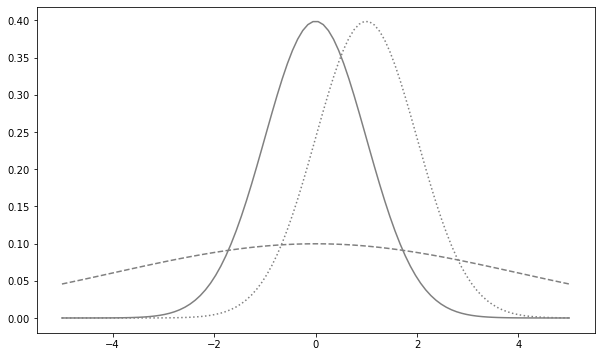

In [14]:
# stats.norm을 활용 -> N(0,1), N(0,4), N(1,1) 비교
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,4),(1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label=f'N({mu},{sigma**2})', ls=ls, color='gray')

ax.legend
plt.show()

$\sigma^2$이 커짐에 따라 분포가 넓어지고, $\mu$가 변화하면 분포 전체가 평행이동함

#### 2. 지수분포 (Exponential Distribution)
* 어떤 사건이 발생하는 간격이 따르는 분포
* 간격이라는 시간이 따르는 분포이므로 확률변수가 취할 수 있는 값은 0 이상의 실수
* 파라미터는 $\lambda$로 양의 실수, 파라미터가 $\lambda$인 지수분포는 $Ex(\lambda)$로 표기
* $Ex(\lambda)$는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포
* 지수분포의 밀도함수:\
$
f(x) = 
\begin{cases}
\lambda e^{-\lambda x} \ (x \geq 0)\\
0 \ (otherwise)
\end{cases}
$
* 예시: 하루당 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 간격, 1시간당 평균 10번 액세스하는 사이트에 대한 액세스 간격
* 지수분포는 포아송 분포와 관련성이 강한 확률분포
* -> 단위시간당 평균 $\lambda$번 발생하는 사건에 대해서 단위시간당 사건이 발생하는 횟숫가 따르는 것이 $Poi(\lambda)$가 되고,\
사건의 발생 간격이 따르는 것이 $Ex(\lambda)$가 되기 때문
* $X \sim Ex(\lambda)$일 때:\
$E(X) = {1 \over \lambda},\ V(X) = {1 \over \lambda^2}$

In [19]:
# numpy 구현
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [20]:
# 람다가 3일 떄
lam = 3
X = Ex(lam)

In [21]:
check_prob(X)

expected value0.333
variance0.111


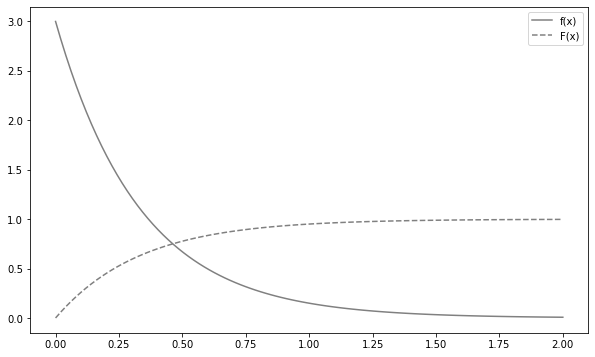

In [22]:
# 0부터 2사이의 구간에서 밀도함수와 분포함수
plot_prob(X,0,2)

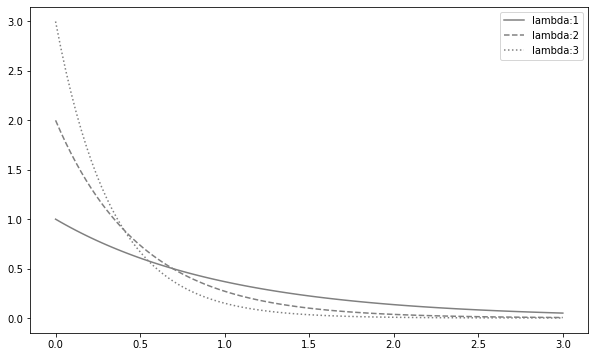

In [23]:
# stats.expon활용
# 람다는 scale에 '1/람다' 형식으로 입력해야함
# 람다를 1,2,3으로 변화시켜 분포 형태 파악
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}', ls=ls, color='gray')

ax.legend()
plt.show()

파라미터 값이 커짐에 따라 확률분포가 점점 감소

#### 3. 카이제곱분포 (Chi-Square Distribution)
* 카이제곱분포, t분포, F분포는 추정과 검정에 상요
* 이러한 분포는 '어떠한 사건이 따른다.'라고 하지 않고, '어떠한 형태를 하고 있다.'라고 설명함
* 정규분포와 어떤 관련성을 맺고 있는지에 중점을 두어 설명
* 카이제곱분포는 분산의 구간추정이나 독립성 검정에서 사용
* $Z_1,Z_2,\dots, Z_n$이 서로 독립이고(서로 영향을 끼치지 않고) $N(0,1)$을 따르고 있을 때, 그 제곱합\
$Y = {\sum_{i=1}^{n}{Z_i}^2}$의 확률분포를 자유도가 n인 카이제곱분포라고 함
* 여기서는... 자유도가 n인 카이제곱분포 -> $\chi^2(n)$

In [24]:
# 표준정규분포에서 표본 크기 10으로 무작위추출, 그 제곱합을 취하는 작업을 100만 번 수행
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포에서 표본 크기 10으로 무작위추출
Zs_sample = rv.rvs((n,sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구함
chi2_sample = np.sum(Zs_sample**2, axis=0)

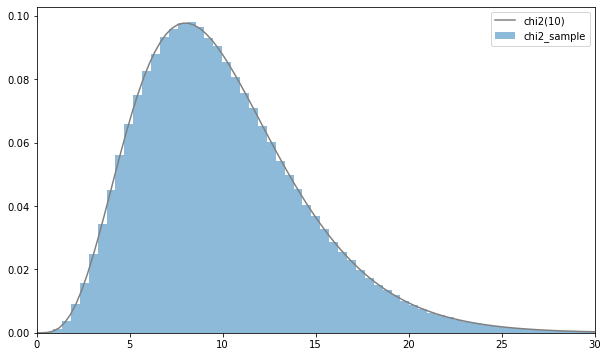

In [25]:
# stats의 chi2메서드 활용
# 첫번째 인수에 자유도 지정
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
ax.hist(chi2_sample, bins=100, density=True, alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0,30)
plt.show()

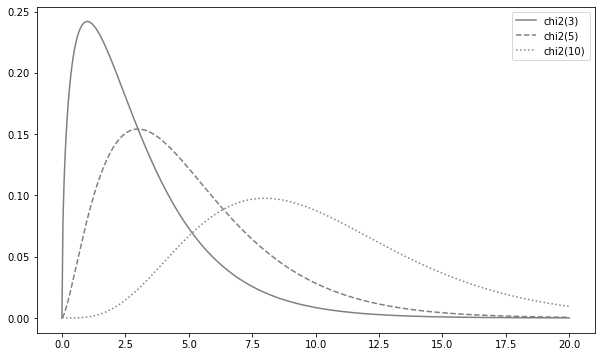

In [26]:
# 자유도 n에 따라 카이제곱분포 형태 파악
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs), label=f'chi2({n})', ls=ls, color='gray')

ax.legend()
plt.show()

* 카이제곱분포의 특징
  - 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어짐
  - 자유도가 커지면 좌우대칭에 가까워짐
  - 자유도의 값 가까이에 분포의 정점이 있음

In [27]:
# 자유도 n인 카이제곱분포의 상위 100알파%점
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355